In [18]:
# Import statements and notebook settings
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import linear_model

show_test_results = True

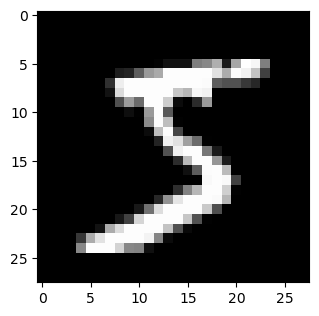

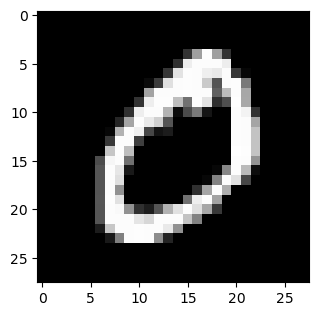

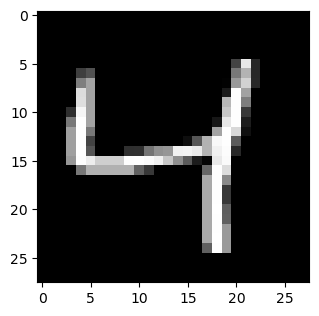

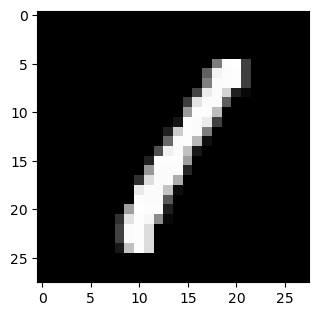

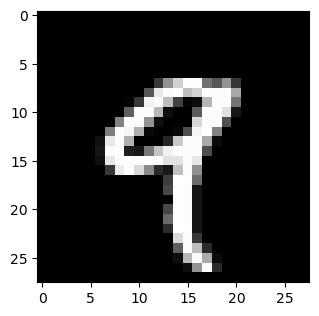

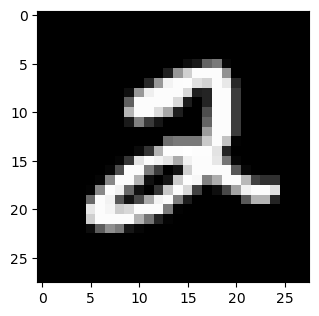

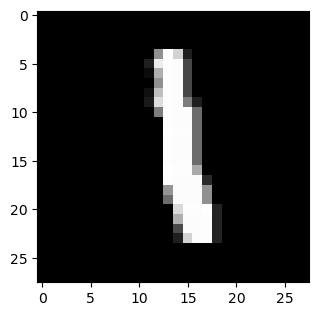

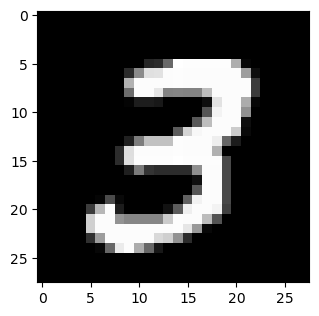

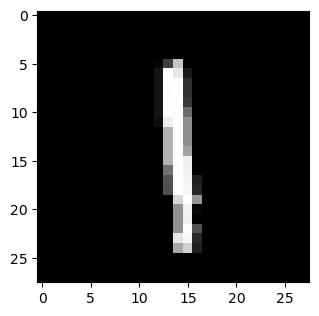

In [32]:
# Importing and reshaping data

(train_data, train_label), (test_data, test_label) = mnist.load_data()
# data_subset = int(6e3)
# train_data = train_data[:data_subset]
# train_label = train_label[:data_subset]

if show_test_results:
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
        plt.show()

# assume all datasets have same dimensions
width = len(train_data[0])
height = len(train_data[0][0])
tot_pixels = width*height
num_labels = 10

# avoid for loop here
def vectorize_data(data, data_len, label, label_len):
    data_vector = np.zeros((len(data), data_len))
    label_vector = np.zeros((len(label), label_len))
    for count, dat in enumerate(data):
        data_vector[count] = dat.flatten()
        label_val = label[count]
        label_vector[count][label_val] = 1
    return data_vector, label_vector

train_A, train_B = vectorize_data(train_data, tot_pixels, train_label, num_labels)
test_A, test_B = vectorize_data(test_data, tot_pixels, test_label, num_labels)

In [3]:
# ## Matrix Overdetermined System - numpy
# plt.rcParams['figure.figsize'] = [12, 12]

# # overdetermined
# n = 300
# m = 60
# p = 20
# A = np.random.rand(n,m)
# b = np.random.rand(n,p)
# lam = np.array([0,0.1])

# xdag = np.linalg.pinv(A)@b
# xdag = xdag.reshape(-1)

# def reg_norm_2d_np0(x,A,b,lam,m,p):
#     # scipy minimize() does not accept multidimensional x
#     # To get around this, we pass x as a vector and reshape it
#     x = np.reshape(x,(m,p))
#     return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)


# fig,axs = plt.subplots(len(lam),1)
# for j in range(len(lam)):
#     res = minimize(reg_norm_2d_np0,args=(A,b,lam[j],m,p),x0=xdag)
#     x = res.x
#     x = x.reshape(m,p)
#     x_pcolor = axs[j].pcolor(x.T,cmap='hot')
#     fig.colorbar(x_pcolor, ax=axs[j])
#     axs[j].set_ylabel('lam='+str(lam[j]))
    
# plt.show()

# # 20 min runtime

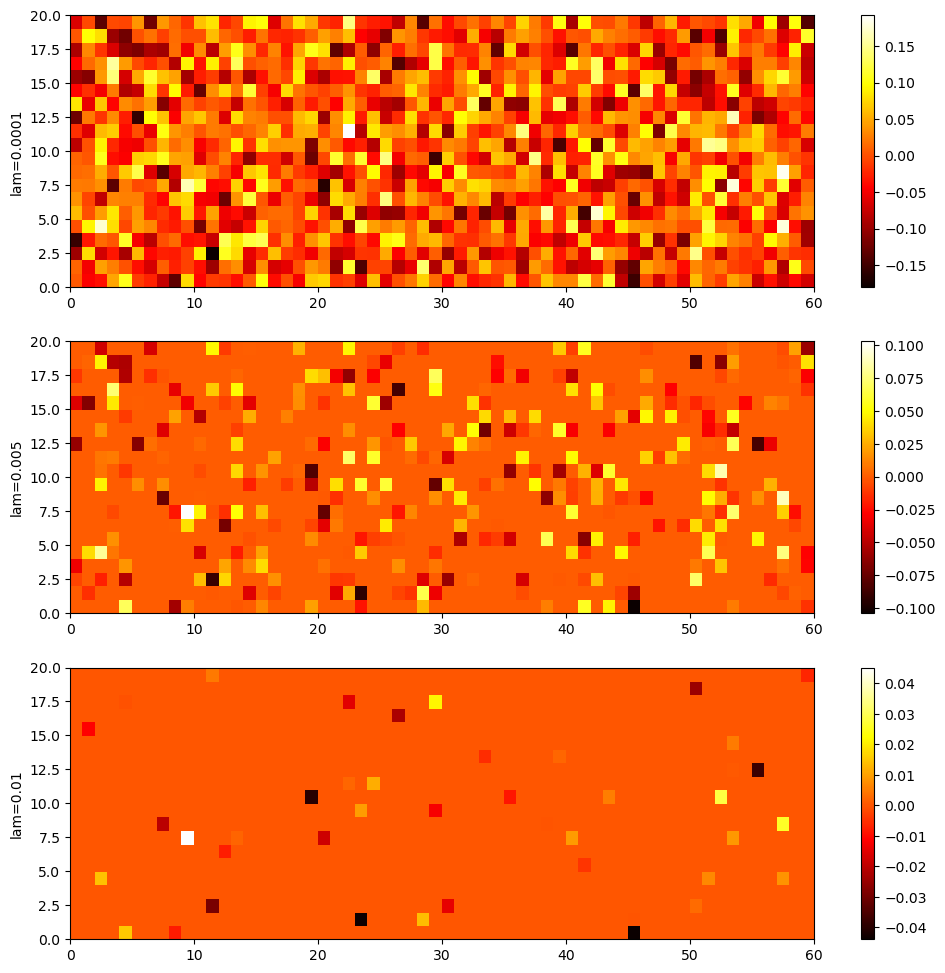

In [4]:
## Matrix Overdetermined System - sklearn
plt.rcParams['figure.figsize'] = [12, 12]

# overdetermined
n = 300
m = 60
p = 20
A = np.random.rand(n,m)
b = np.random.rand(n,p)

lam_array = np.array([0.0001, 0.005, 0.007])

clf0 = linear_model.Lasso(alpha = lam_array[0])
clf0.fit(A, b)
clf1 = linear_model.Lasso(alpha = lam_array[1])
clf1.fit(A, b)
clf2 = linear_model.Lasso(alpha = lam_array[2])
clf2.fit(A, b)

clf_array = [clf0, clf1, clf2]

fig,axs = plt.subplots(len(lam_array),1)
for j, lam in enumerate(lam_array):
    x = clf_array[j].coef_
    x_pcolor = axs[j].pcolor(x,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel(f"lam={lam}") 

In [5]:
# ## Matrix Overdetermined System - numpy with jit
# plt.rcParams['figure.figsize'] = [12, 12]

# # overdetermined
# n = 300
# m = 60
# p = 20
# A = np.random.rand(n,m)
# b = np.random.rand(n,p)
# lam = np.array([0,0.1])

# xdag = np.linalg.pinv(A)@b
# xdag = xdag.reshape(-1)

# @nb.njit(fastmath=True)
# def reg_norm_2d_np0(x,A,b,lam,m,p):
#     # scipy minimize() does not accept multidimensional x
#     # To get around this, we pass x as a vector and reshape it
#     x = np.reshape(x,(m,p))
#     return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)

# Neval = 1
# starttime = time.time()
# def callbackF(res):
#     global Neval
#     global starttime
#     if Neval%100 == 0:
#         print(F"{Neval}:\t{time.time()-starttime}\t{res.sum()}")
#     Neval += 1

# fig,axs = plt.subplots(len(lam),1)
# for j in range(len(lam)):
#     Neval = 1
#     starttime = time.time()
#     res = minimize(reg_norm_2d_np0,args=(A,b,lam[j],m,p),x0=xdag, callback=callbackF, 
#                    options={"maxiter":300}
#                    )
#     x = res.x
#     x = x.reshape(m,p)
#     x_pcolor = axs[j].pcolor(x.T,cmap='hot')
#     fig.colorbar(x_pcolor, ax=axs[j])
#     axs[j].set_ylabel('lam='+str(lam[j]))
    
# plt.show()

# # 4 min runtime

# # runtime with callback: 5.75 min (with jit)
# # 100:	23.233869791030884	18.809913980722964
# # 200:	49.10468864440918	18.816569883552454
# # 300:	74.18661618232727	18.815126027764975
# # 400:	100.55111336708069	18.82523649403156
# # 500:	128.40762186050415	18.827783819431
# # 600:	158.02020525932312	18.83037459118134
# # 700:	187.12725067138672	18.831026970700222
# # 800:	222.25631093978882	18.82362697278257
# # 900:	262.9500331878662	18.822188083774698
# # 1000:	316.52502846717834	18.82192063523459

# # runtime with callback (300 iter): 2 min; no jit
# # 100:	37.26344585418701	19.11235996737359
# # 200:	72.96788716316223	19.075097867049102
# # 300:	112.21007490158081	19.05586272872373

# # runtime with callback (300 iter): 1.5 min; w/ jit
# # 100:	24.771344900131226	18.972711261707012
# # 200:	53.691246032714844	18.952211780012476
# # 300:	81.41889762878418	18.95608913788901

iter 0: 153.9622721672058 sec
iter 1: 134.97771573066711 sec
iter 2: 77.27799987792969 sec
iter 3: 68.29710125923157 sec
iter 4: 50.657193183898926 sec
iter 5: 46.516109228134155 sec


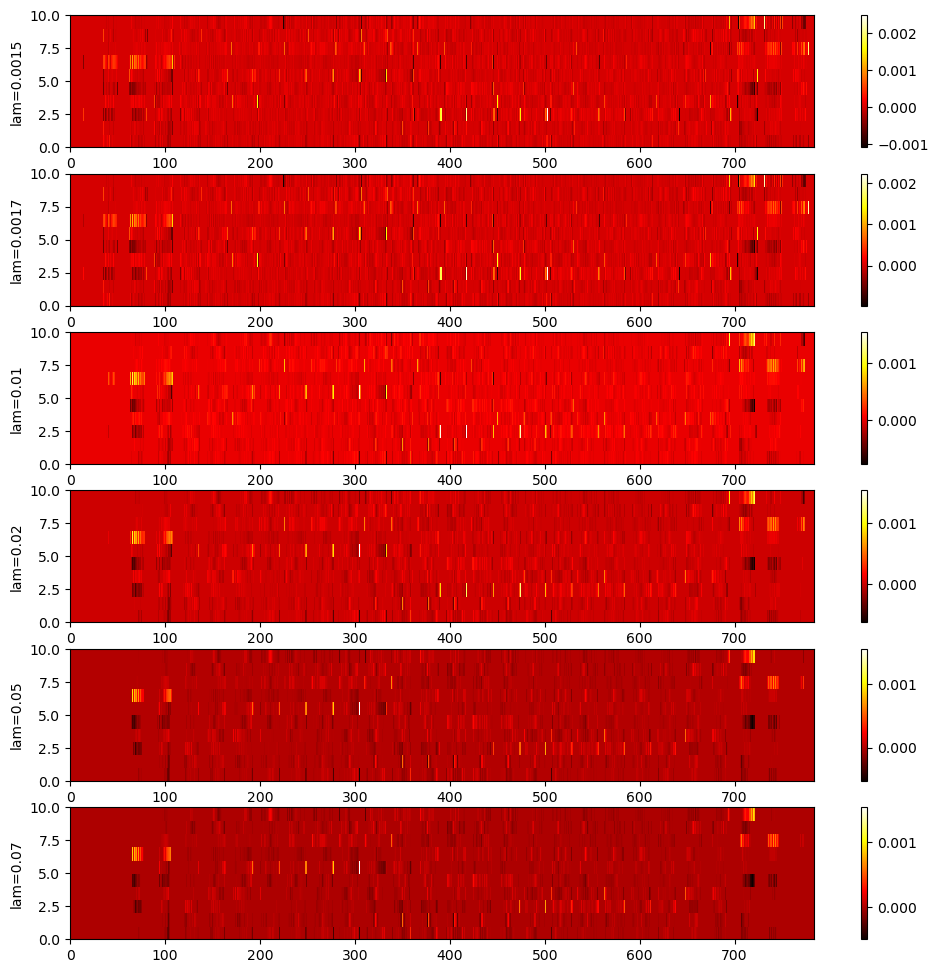

In [53]:
# solve AX=B to find pixels that map to correct label outcome
plt.rcParams['figure.figsize'] = [12, 12]

lam_array = np.array([1.5e-3, 1.7e-3, 1e-2, 2e-2, 5e-2, 7e-2])

def generate_models(A, b, lambda_array):
    model_array = []
    for i, lam in enumerate(lambda_array):
        start = time.time()
        if lam==0:
            clf = linear_model.LinearRegression(fit_intercept=False)
        else:
            clf = linear_model.Lasso(alpha=lam, fit_intercept=False, warm_start=True, selection='random')
        clf.fit(A, b)
        elapsed = time.time() - start
        print(f"iter {i}: {elapsed} sec")
        model_array.append(clf)
    return model_array

clf_array = generate_models(train_A, train_B, lam_array)

fig,axs = plt.subplots(len(lam_array),1)
for j, lam in enumerate(lam_array):
    x = clf_array[j].coef_
    x_pcolor = axs[j].pcolor(x,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel(f"lam={lam}") 

plt.show()

In [35]:
# # Test model and multiply it by first image

# for j in range(5):
#     print(f"value: {train_label[j]}")
#     for i, lam in enumerate(lam_array):
#         test_model = clf_array[i].coef_
#         image1 = train_A[j]
        
#         b1 = image1.T@test_model.T
#         b1[b1<0.1] = int(0)

#         max_loc = np.argmax(b1)
#         print(f"Value estimate: {max_loc}")

#         print(f"lam={lam}\tresult: {b1}\n")
        

value: 5
Value estimate: 5
lam=0.0	result: [0.         0.         0.         0.43201843 0.         0.51216861
 0.18484194 0.31593389 0.         0.        ]

Value estimate: 5
lam=0.0001	result: [0.         0.         0.         0.43225376 0.         0.51144923
 0.18666784 0.31467153 0.         0.        ]

Value estimate: 5
lam=0.001	result: [0.         0.         0.         0.43307926 0.         0.50940786
 0.19031404 0.30726212 0.         0.        ]

Value estimate: 5
lam=0.01	result: [0.         0.         0.         0.42206369 0.         0.50301624
 0.18907996 0.27364821 0.         0.        ]

Value estimate: 5
lam=0.1	result: [0.10082868 0.         0.         0.37238559 0.         0.4645894
 0.17456484 0.21730735 0.         0.        ]

Value estimate: 3
lam=1.0	result: [0.10900583 0.         0.         0.31626122 0.         0.267141
 0.15761071 0.14127009 0.         0.        ]

Value estimate: 0
lam=10.0	result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

value: 0
Value estimate: 0
lam=0

In [60]:
# Test data: model lamda=0
true_pos = np.zeros((num_labels,1))
total_tests = 0
model = 3
for model, lam in enumerate(lam_array):
    true_pos = np.zeros((num_labels,1))
    total_tests = 0
    test_model = clf_array[model].coef_
    for column in test_A:
        class_prob = column@test_model.T
        class_max = np.argmax(class_prob)
        if class_max == test_label[total_tests]:
            true_pos[class_max] += 1
        total_tests += 1

    print(f"lambda: {lam_array[model]}")
    print(f"true_pos: {true_pos.sum()}\ttotal_tests: {total_tests}\ttest_data: {len(test_data)}")
    


lambda: 0.0015
true_pos: 8540.0	total_tests: 10000	test_data: 10000
lambda: 0.0017
true_pos: 8540.0	total_tests: 10000	test_data: 10000
lambda: 0.01
true_pos: 8546.0	total_tests: 10000	test_data: 10000
lambda: 0.02
true_pos: 8551.0	total_tests: 10000	test_data: 10000
lambda: 0.05
true_pos: 8543.0	total_tests: 10000	test_data: 10000
lambda: 0.07
true_pos: 8542.0	total_tests: 10000	test_data: 10000
